### Bootstrap

#### Packages

In [1]:
import pandas as pkg_pandas
import numpy as pkg_numpy
from matplotlib import pyplot as pkg_plot
from sklearn import linear_model as pkg_linear_model
from sklearn import model_selection as pkg_model_selection
from sklearn import datasets as pkg_datasets
from sklearn import metrics as pkg_metrics
import seaborn as pkg_seaborn

#### Load Data

In [2]:
loaded_data = pkg_datasets.load_iris()
dir(loaded_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print("\nData Module = {}\nFile Name = {}\nFrame = {}".format(\
    loaded_data.data_module, loaded_data.filename, loaded_data.frame))


Data Module = sklearn.datasets.data
File Name = iris.csv
Frame = None


In [4]:
print("\nFeature Names = {}\nTarget Names = {}".format(\
    loaded_data.feature_names, loaded_data.target_names))


Feature Names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names = ['setosa' 'versicolor' 'virginica']


In [5]:
for i in range(10):
    index = i^2
    print("Index = {}, Input = {}, Output = {}".format(index, loaded_data.data[index], loaded_data.target[index]))

Index = 2, Input = [4.7 3.2 1.3 0.2], Output = 0
Index = 3, Input = [4.6 3.1 1.5 0.2], Output = 0
Index = 0, Input = [5.1 3.5 1.4 0.2], Output = 0
Index = 1, Input = [4.9 3.  1.4 0.2], Output = 0
Index = 6, Input = [4.6 3.4 1.4 0.3], Output = 0
Index = 7, Input = [5.  3.4 1.5 0.2], Output = 0
Index = 4, Input = [5.  3.6 1.4 0.2], Output = 0
Index = 5, Input = [5.4 3.9 1.7 0.4], Output = 0
Index = 10, Input = [5.4 3.7 1.5 0.2], Output = 0
Index = 11, Input = [4.8 3.4 1.6 0.2], Output = 0


### Analysis

#### Pre-Work

In [6]:
baseline_inputs = loaded_data.data
baseline_outputs = loaded_data.target

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 150, Train = 112, Test = 38


#### Model: Train (Fit)

In [7]:
model = pkg_linear_model.LogisticRegression(max_iter=200)
model.fit(X=train_inputs, y=train_outputs)
model

LogisticRegression(max_iter=200)

In [8]:
model.score(X=test_inputs, y=test_outputs)

0.9736842105263158

#### Model: Test (Predict)

In [9]:
for i in range(10):
    index = (i+1)*i
    predicted = model.predict([loaded_data.data[index]])
    actual = loaded_data.target[index]
    #pkg_plot.matshow(loaded_data.data[index])
    print("Index = {}, Input = {}, Predicted = {}, Actual = {}".format(index, loaded_data.data[index], predicted[0], actual))

Index = 0, Input = [5.1 3.5 1.4 0.2], Predicted = 0, Actual = 0
Index = 2, Input = [4.7 3.2 1.3 0.2], Predicted = 0, Actual = 0
Index = 6, Input = [4.6 3.4 1.4 0.3], Predicted = 0, Actual = 0
Index = 12, Input = [4.8 3.  1.4 0.1], Predicted = 0, Actual = 0
Index = 20, Input = [5.4 3.4 1.7 0.2], Predicted = 0, Actual = 0
Index = 30, Input = [4.8 3.1 1.6 0.2], Predicted = 0, Actual = 0
Index = 42, Input = [4.4 3.2 1.3 0.2], Predicted = 0, Actual = 0
Index = 56, Input = [6.3 3.3 4.7 1.6], Predicted = 1, Actual = 1
Index = 72, Input = [6.3 2.5 4.9 1.5], Predicted = 1, Actual = 1
Index = 90, Input = [5.5 2.6 4.4 1.2], Predicted = 1, Actual = 1


#### Confusion Matrix: Test Data

In [10]:
predicted_outputs = model.predict(test_inputs)
len(predicted_outputs)

38

In [11]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=predicted_outputs)
cm

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 16]])

<AxesSubplot:>

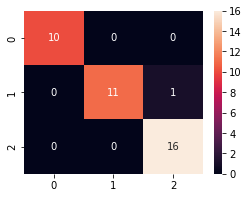

In [12]:
pkg_plot.figure(figsize=(4,3))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)

#### Confusion Matrix: All Data

In [13]:
predicted_outputs = model.predict(baseline_inputs)
len(predicted_outputs)

150

In [14]:
cm = pkg_metrics.confusion_matrix(y_true=baseline_outputs, y_pred=predicted_outputs)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]])

<AxesSubplot:>

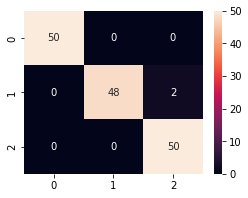

In [15]:
pkg_plot.figure(figsize=(4,3))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)